[View in Colaboratory](https://colab.research.google.com/github/Curiousss/InkerIntern/blob/master/FER_WINO_SEPARABLE_NO_CUDNN.ipynb)

In [8]:
from google.colab import files
uploaded = files.upload()

Saving baddata.txt to baddata.txt


In [2]:
!ls

datalab  fer2013.tar


In [42]:
import os
!export TF_ENABLE_WINOGRAD_NONFUSED=1
os.environ['TF_ENABLE_WINOGRAD_NONFUSED'] = '1'
os.environ.pop('TF_ENABLE_WINOGRAD_NONFUSED', None)

'1'

In [3]:
!tar xvf fer2013.tar
!ls

fer2013/fer2013.csv
fer2013/README
fer2013/fer2013.bib
fer2013/
datalab  fer2013  fer2013.tar


In [4]:

import csv
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D, InputLayer
from keras.layers import Convolution2D, SeparableConv2D, MaxPooling2D, BatchNormalization 
from keras.layers.advanced_activations import LeakyReLU
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
img_rows, img_cols = 48, 48
batch_size = 64
classes = 7
epoch = 100
img_channels = 1

In [0]:
import csv
f = open('fer2013/fer2013.csv')
csv_f = csv.reader(f)


In [0]:
train_x = []
train_y = []
val_x =[]
val_y =[]

In [0]:
ToBeRemovedTrainingData = []
with open("baddata.txt", "r") as text:
  for line in text:
    ToBeRemovedTrainingData.append(int(line))

In [0]:
num=0
for row in csv_f:
  num = num +1
  if num in ToBeRemovedTrainingData or num==1:
    continue
  #print(row)
  #print(num)
  temp_list = []
  for pixel in row[1].split( ):
    temp_list.append(int(pixel))

  if str(row[2]) == "Training":
    train_y.append(int(row[0]))
    train_x.append(temp_list) 
  elif str(row[2]) == "PublicTest":
    val_y.append(int(row[0]))
    val_x.append(temp_list)

In [0]:
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
val_x = np.asarray(val_x)
val_y = np.asarray(val_y)

In [0]:
train_x = train_x.reshape(train_x.shape[0], 48, 48)
train_x = train_x.reshape(train_x.shape[0], 48, 48, 1 )
train_y = np_utils.to_categorical(train_y, 7)

In [0]:
val_x = val_x.reshape(val_x.shape[0], 48, 48)
val_x = val_x.reshape(val_x.shape[0], 48, 48, 1)
val_y = np_utils.to_categorical(val_y, 7)

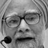

In [14]:
from PIL import Image

#print(train_x.shape)

showimg = train_x[1].reshape(48,48)
img = Image.fromarray(showimg.astype('uint8'))
from IPython.display import display
display(img)

In [0]:
train_x = train_x.astype('float32')
train_x = train_x / 255.0
val_x = val_x.astype('float32')
val_x = val_x / 255.0
train_x = train_x - 0.5
train_x = train_x * 2
val_x = val_x - 0.5
val_x = val_x * 2


In [0]:
input_shape = (img_rows, img_cols, img_channels)
model = Sequential()
model.add(SeparableConv2D(filters=64, kernel_size=(3, 3), padding='same',
                            name='image_array', input_shape=input_shape))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(.3))

model.add(SeparableConv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(.3))

model.add(SeparableConv2D(filters=256, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=256, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(.3))

model.add(SeparableConv2D(filters=512, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=512, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(.3))

'''
model.add(SeparableConv2D(filters=1024, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=1024, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
'''

#model.add(Flatten())
'''

model.add(Dense(2048))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(.5))
'''
model.add(InputLayer(input_shape=(3, 3, 1024)))
model.add(GlobalAveragePooling2D())
'''
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(.5))
'''
model.add(Dense(7))
model.add(Activation('softmax'))

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_array (SeparableConv2D (None, 48, 48, 64)        137       
_________________________________________________________________
batch_normalization_35 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
leaky_re_lu_35 (LeakyReLU)   (None, 48, 48, 64)        0         
_________________________________________________________________
separable_conv2d_31 (Separab (None, 48, 48, 64)        4736      
_________________________________________________________________
batch_normalization_36 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
leaky_re_lu_36 (LeakyReLU)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 24, 24, 64)        0         
__________

In [0]:
model.compile(optimizer='Adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
filepath='Model.best.hdf5'
checkpointer = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')


In [0]:
model.load_weights('Model.best.hdf5')

In [31]:

import time
start_time = time.time()

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    shear_range=0.2,
    zoom_range=0.2)  # randomly flip images

datagen.fit(train_x)

model.fit_generator(datagen.flow(train_x, train_y,
                    batch_size=batch_size),
                    steps_per_epoch=(train_x.shape[0]/batch_size),
                    epochs=50,
                    validation_data=(val_x, val_y),
                    callbacks=[checkpointer])
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/50
447/446 [==============================] - 58s 130ms/step - loss: 0.7366 - acc: 0.7244 - val_loss: 1.0384 - val_acc: 0.6494

Epoch 00001: val_acc did not improve from 0.66806
Epoch 2/50
214/446 [=============>................] - ETA: 29s - loss: 0.7330 - acc: 0.7278

447/446 [==============================] - 58s 130ms/step - loss: 0.7403 - acc: 0.7270 - val_loss: 1.0104 - val_acc: 0.6605

Epoch 00002: val_acc did not improve from 0.66806
Epoch 3/50
305/446 [===================>..........] - ETA: 17s - loss: 0.7287 - acc: 0.7264

447/446 [==============================] - 58s 130ms/step - loss: 0.7369 - acc: 0.7266 - val_loss: 1.0407 - val_acc: 0.6566

Epoch 00003: val_acc did not improve from 0.66806
Epoch 4/50
333/446 [=====================>........] - ETA: 14s - loss: 0.7336 - acc: 0.7294

447/446 [==============================] - 58s 130ms/step - loss: 0.7389 - acc: 0.7273 - val_loss: 1.0573 - val_acc: 0.6502

Epoch 00004: val_acc did not improve from 0.66806
Epoch 5/50
341/446 [=====================>........] - ETA: 13s - loss: 0.7294 - acc: 0.7287

447/446 [==============================] - 58s 130ms/step - loss: 0.7338 - acc: 0.7264 - val_loss: 1.0269 - val_acc: 0.6530

Epoch 00005: val_acc did not improve from 0.66806
Epoch 6/50
343/446 [======================>.......] - ETA: 12s - loss: 0.7377 - acc: 0.7255

447/446 [==============================] - 58s 130ms/step - loss: 0.7350 - acc: 0.7253 - val_loss: 1.0282 - val_acc: 0.6589

Epoch 00006: val_acc did not improve from 0.66806
Epoch 7/50
344/446 [======================>.......] - ETA: 12s - loss: 0.7346 - acc: 0.7278

447/446 [==============================] - 58s 130ms/step - loss: 0.7343 - acc: 0.7271 - val_loss: 1.0568 - val_acc: 0.6413

Epoch 00007: val_acc did not improve from 0.66806
Epoch 8/50
344/446 [======================>.......] - ETA: 12s - loss: 0.7259 - acc: 0.7310

447/446 [==============================] - 58s 130ms/step - loss: 0.7259 - acc: 0.7313 - val_loss: 1.0434 - val_acc: 0.6628

Epoch 00008: val_acc did not improve from 0.66806
Epoch 9/50
344/446 [======================>.......] - ETA: 12s - loss: 0.7376 - acc: 0.7277

447/446 [==============================] - 58s 130ms/step - loss: 0.7328 - acc: 0.7293 - val_loss: 1.0500 - val_acc: 0.6530

Epoch 00009: val_acc did not improve from 0.66806
Epoch 10/50
343/446 [======================>.......] - ETA: 13s - loss: 0.7247 - acc: 0.7315

447/446 [==============================] - 58s 130ms/step - loss: 0.7262 - acc: 0.7307 - val_loss: 1.0310 - val_acc: 0.6455

Epoch 00010: val_acc did not improve from 0.66806
Epoch 11/50
343/446 [======================>.......] - ETA: 13s - loss: 0.7121 - acc: 0.7367

447/446 [==============================] - 58s 130ms/step - loss: 0.7156 - acc: 0.7370 - val_loss: 1.0401 - val_acc: 0.6580

Epoch 00011: val_acc did not improve from 0.66806
Epoch 12/50
343/446 [======================>.......] - ETA: 13s - loss: 0.7108 - acc: 0.7350

447/446 [==============================] - 58s 130ms/step - loss: 0.7137 - acc: 0.7342 - val_loss: 1.0789 - val_acc: 0.6577

Epoch 00012: val_acc did not improve from 0.66806
Epoch 13/50
343/446 [======================>.......] - ETA: 13s - loss: 0.7084 - acc: 0.7387

447/446 [==============================] - 58s 130ms/step - loss: 0.7143 - acc: 0.7354 - val_loss: 1.0407 - val_acc: 0.6552

Epoch 00013: val_acc did not improve from 0.66806
Epoch 14/50
343/446 [======================>.......] - ETA: 13s - loss: 0.7205 - acc: 0.7353

447/446 [==============================] - 58s 130ms/step - loss: 0.7145 - acc: 0.7347 - val_loss: 1.0414 - val_acc: 0.6603

Epoch 00014: val_acc did not improve from 0.66806
Epoch 15/50
343/446 [======================>.......] - ETA: 13s - loss: 0.7049 - acc: 0.7367

447/446 [==============================] - 58s 130ms/step - loss: 0.7086 - acc: 0.7353 - val_loss: 1.0522 - val_acc: 0.6524

Epoch 00015: val_acc did not improve from 0.66806
Epoch 16/50
343/446 [======================>.......] - ETA: 13s - loss: 0.7025 - acc: 0.7379

447/446 [==============================] - 58s 130ms/step - loss: 0.7046 - acc: 0.7380 - val_loss: 1.0414 - val_acc: 0.6563

Epoch 00016: val_acc did not improve from 0.66806
Epoch 17/50
343/446 [======================>.......] - ETA: 13s - loss: 0.7012 - acc: 0.7427

447/446 [==============================] - 58s 130ms/step - loss: 0.7017 - acc: 0.7408 - val_loss: 1.0970 - val_acc: 0.6536

Epoch 00017: val_acc did not improve from 0.66806
Epoch 18/50
343/446 [======================>.......] - ETA: 13s - loss: 0.7038 - acc: 0.7370

447/446 [==============================] - 58s 130ms/step - loss: 0.7054 - acc: 0.7361 - val_loss: 1.0730 - val_acc: 0.6469

Epoch 00018: val_acc did not improve from 0.66806
Epoch 19/50
343/446 [======================>.......] - ETA: 13s - loss: 0.7003 - acc: 0.7395

447/446 [==============================] - 58s 130ms/step - loss: 0.7046 - acc: 0.7368 - val_loss: 1.0719 - val_acc: 0.6508

Epoch 00019: val_acc did not improve from 0.66806
Epoch 20/50
343/446 [======================>.......] - ETA: 12s - loss: 0.6889 - acc: 0.7415

447/446 [==============================] - 58s 130ms/step - loss: 0.6958 - acc: 0.7404 - val_loss: 1.0545 - val_acc: 0.6538

Epoch 00020: val_acc did not improve from 0.66806
Epoch 21/50
343/446 [======================>.......] - ETA: 13s - loss: 0.6905 - acc: 0.7434

447/446 [==============================] - 58s 130ms/step - loss: 0.6958 - acc: 0.7412 - val_loss: 1.0798 - val_acc: 0.6541

Epoch 00021: val_acc did not improve from 0.66806
Epoch 22/50
343/446 [======================>.......] - ETA: 13s - loss: 0.6905 - acc: 0.7443

447/446 [==============================] - 58s 130ms/step - loss: 0.6917 - acc: 0.7442 - val_loss: 1.0848 - val_acc: 0.6444

Epoch 00022: val_acc did not improve from 0.66806
Epoch 23/50
343/446 [======================>.......] - ETA: 13s - loss: 0.6870 - acc: 0.7459

447/446 [==============================] - 58s 130ms/step - loss: 0.6959 - acc: 0.7423 - val_loss: 1.0604 - val_acc: 0.6630

Epoch 00023: val_acc did not improve from 0.66806
Epoch 24/50
343/446 [======================>.......] - ETA: 13s - loss: 0.6903 - acc: 0.7445

447/446 [==============================] - 58s 130ms/step - loss: 0.6926 - acc: 0.7450 - val_loss: 1.0479 - val_acc: 0.6616

Epoch 00024: val_acc did not improve from 0.66806
Epoch 25/50
343/446 [======================>.......] - ETA: 13s - loss: 0.6848 - acc: 0.7480

447/446 [==============================] - 58s 130ms/step - loss: 0.6911 - acc: 0.7453 - val_loss: 1.0386 - val_acc: 0.6597

Epoch 00025: val_acc did not improve from 0.66806
Epoch 26/50
343/446 [======================>.......] - ETA: 13s - loss: 0.6761 - acc: 0.7472

447/446 [==============================] - 58s 130ms/step - loss: 0.6884 - acc: 0.7411 - val_loss: 1.0343 - val_acc: 0.6625

Epoch 00026: val_acc did not improve from 0.66806
Epoch 27/50
343/446 [======================>.......] - ETA: 13s - loss: 0.6810 - acc: 0.7466

447/446 [==============================] - 58s 130ms/step - loss: 0.6808 - acc: 0.7466 - val_loss: 1.0896 - val_acc: 0.6594

Epoch 00027: val_acc did not improve from 0.66806
Epoch 28/50
343/446 [======================>.......] - ETA: 13s - loss: 0.6780 - acc: 0.7503

447/446 [==============================] - 58s 130ms/step - loss: 0.6784 - acc: 0.7494 - val_loss: 1.1449 - val_acc: 0.6430

Epoch 00028: val_acc did not improve from 0.66806
Epoch 29/50
343/446 [======================>.......] - ETA: 13s - loss: 0.6849 - acc: 0.7435

447/446 [==============================] - 58s 130ms/step - loss: 0.6834 - acc: 0.7461 - val_loss: 1.1220 - val_acc: 0.6522

Epoch 00029: val_acc did not improve from 0.66806
Epoch 30/50
343/446 [======================>.......] - ETA: 13s - loss: 0.6678 - acc: 0.7515

447/446 [==============================] - 58s 130ms/step - loss: 0.6739 - acc: 0.7502 - val_loss: 1.1082 - val_acc: 0.6536

Epoch 00030: val_acc did not improve from 0.66806
Epoch 31/50
343/446 [======================>.......] - ETA: 13s - loss: 0.6738 - acc: 0.7517

447/446 [==============================] - 58s 130ms/step - loss: 0.6752 - acc: 0.7515 - val_loss: 1.0753 - val_acc: 0.6594

Epoch 00031: val_acc did not improve from 0.66806
Epoch 32/50
343/446 [======================>.......] - ETA: 13s - loss: 0.6718 - acc: 0.7508

447/446 [==============================] - 58s 130ms/step - loss: 0.6714 - acc: 0.7503 - val_loss: 1.1224 - val_acc: 0.6505

Epoch 00032: val_acc did not improve from 0.66806
Epoch 33/50
343/446 [======================>.......] - ETA: 13s - loss: 0.6681 - acc: 0.7532

447/446 [==============================] - 58s 130ms/step - loss: 0.6731 - acc: 0.7517 - val_loss: 1.0559 - val_acc: 0.6644

Epoch 00033: val_acc did not improve from 0.66806
Epoch 34/50
343/446 [======================>.......] - ETA: 12s - loss: 0.6652 - acc: 0.7536

447/446 [==============================] - 58s 130ms/step - loss: 0.6716 - acc: 0.7528 - val_loss: 1.2007 - val_acc: 0.6388

Epoch 00034: val_acc did not improve from 0.66806
Epoch 35/50
343/446 [======================>.......] - ETA: 13s - loss: 0.6632 - acc: 0.7533

447/446 [==============================] - 58s 131ms/step - loss: 0.6644 - acc: 0.7540 - val_loss: 1.1495 - val_acc: 0.6446

Epoch 00035: val_acc did not improve from 0.66806
Epoch 36/50
343/446 [======================>.......] - ETA: 12s - loss: 0.6671 - acc: 0.7507

447/446 [==============================] - 58s 130ms/step - loss: 0.6690 - acc: 0.7498 - val_loss: 1.1078 - val_acc: 0.6505

Epoch 00036: val_acc did not improve from 0.66806
Epoch 37/50
343/446 [======================>.......] - ETA: 13s - loss: 0.6660 - acc: 0.7534

447/446 [==============================] - 58s 130ms/step - loss: 0.6677 - acc: 0.7528 - val_loss: 1.0639 - val_acc: 0.6619

Epoch 00037: val_acc did not improve from 0.66806
Epoch 38/50
343/446 [======================>.......] - ETA: 13s - loss: 0.6564 - acc: 0.7558

447/446 [==============================] - 58s 130ms/step - loss: 0.6591 - acc: 0.7550 - val_loss: 1.1268 - val_acc: 0.6591

Epoch 00038: val_acc did not improve from 0.66806
Epoch 39/50
343/446 [======================>.......] - ETA: 13s - loss: 0.6528 - acc: 0.7562

447/446 [==============================] - 58s 130ms/step - loss: 0.6546 - acc: 0.7557 - val_loss: 1.1126 - val_acc: 0.6642

Epoch 00039: val_acc did not improve from 0.66806
Epoch 40/50
343/446 [======================>.......] - ETA: 13s - loss: 0.6506 - acc: 0.7572

447/446 [==============================] - 58s 130ms/step - loss: 0.6555 - acc: 0.7553 - val_loss: 1.1172 - val_acc: 0.6583

Epoch 00040: val_acc did not improve from 0.66806
Epoch 41/50
343/446 [======================>.......] - ETA: 13s - loss: 0.6534 - acc: 0.7567

447/446 [==============================] - 58s 130ms/step - loss: 0.6555 - acc: 0.7570 - val_loss: 1.1024 - val_acc: 0.6444

Epoch 00041: val_acc did not improve from 0.66806
Epoch 42/50
343/446 [======================>.......] - ETA: 13s - loss: 0.6626 - acc: 0.7537

447/446 [==============================] - 58s 130ms/step - loss: 0.6628 - acc: 0.7532 - val_loss: 1.0972 - val_acc: 0.6633

Epoch 00042: val_acc did not improve from 0.66806
Epoch 43/50
343/446 [======================>.......] - ETA: 13s - loss: 0.6424 - acc: 0.7646

447/446 [==============================] - 58s 130ms/step - loss: 0.6467 - acc: 0.7615 - val_loss: 1.0508 - val_acc: 0.6647

Epoch 00043: val_acc did not improve from 0.66806
Epoch 44/50
343/446 [======================>.......] - ETA: 13s - loss: 0.6441 - acc: 0.7615

447/446 [==============================] - 58s 130ms/step - loss: 0.6459 - acc: 0.7613 - val_loss: 1.1035 - val_acc: 0.6577

Epoch 00044: val_acc did not improve from 0.66806
Epoch 45/50
343/446 [======================>.......] - ETA: 13s - loss: 0.6380 - acc: 0.7638

447/446 [==============================] - 58s 130ms/step - loss: 0.6453 - acc: 0.7611 - val_loss: 1.0878 - val_acc: 0.6689

Epoch 00045: val_acc improved from 0.66806 to 0.66890, saving model to Model.best.hdf5
Epoch 46/50
300/446 [===================>..........] - ETA: 18s - loss: 0.6365 - acc: 0.7642

447/446 [==============================] - 58s 130ms/step - loss: 0.6419 - acc: 0.7626 - val_loss: 1.0969 - val_acc: 0.6672

Epoch 00046: val_acc did not improve from 0.66890
Epoch 47/50
330/446 [=====================>........] - ETA: 14s - loss: 0.6405 - acc: 0.7624

447/446 [==============================] - 58s 131ms/step - loss: 0.6451 - acc: 0.7592 - val_loss: 1.1023 - val_acc: 0.6510

Epoch 00047: val_acc did not improve from 0.66890
Epoch 48/50
339/446 [=====================>........] - ETA: 13s - loss: 0.6465 - acc: 0.7574

447/446 [==============================] - 58s 130ms/step - loss: 0.6477 - acc: 0.7586 - val_loss: 1.1123 - val_acc: 0.6519

Epoch 00048: val_acc did not improve from 0.66890
Epoch 49/50
341/446 [=====================>........] - ETA: 13s - loss: 0.6250 - acc: 0.7693

447/446 [==============================] - 58s 130ms/step - loss: 0.6355 - acc: 0.7659 - val_loss: 1.1264 - val_acc: 0.6544

Epoch 00049: val_acc did not improve from 0.66890
Epoch 50/50
342/446 [=====================>........] - ETA: 13s - loss: 0.6304 - acc: 0.7698

447/446 [==============================] - 58s 130ms/step - loss: 0.6397 - acc: 0.7648 - val_loss: 1.1694 - val_acc: 0.6544

Epoch 00050: val_acc did not improve from 0.66890
--- 2910.3238973617554 seconds ---


In [0]:
def predict_emotion(model, pic):
  pic = pic.convert('L')
  pic = pic.resize((48,48))
  
  from IPython.display import display
  display(pic)
  pic_np=np.asarray(pic)#.getdata()).reshape(48, 48, 1)
  pic_np = pic_np.reshape(1, 48, 48, 1)
  print(pic_np.shape)
  pic_np = pic_np / 255.0
  pic_np = pic_np - 0.5
  pic_np = pic_np * 2
  
  print(pic_np.shape)
  y = model.predict(pic_np)
  print("0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral")
  print(y)

In [33]:
from google.colab import files
uploaded = files.upload()

Saving celebfer2.jpg to celebfer2.jpg


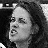

(1, 48, 48, 1)
(1, 48, 48, 1)
0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
[[0.18686783 0.00278126 0.02311718 0.1430708  0.5308481  0.00143547
  0.1118793 ]]


In [31]:
celebanger = Image.open("celeb_fer1.jpg")
predict_emotion(model, celebanger)


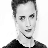

(1, 48, 48, 1)
(1, 48, 48, 1)
0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
[[0.5319344  0.00196936 0.07488633 0.05328509 0.07548652 0.00826073
  0.25417757]]


In [32]:
celeb = Image.open("Celeb.jpg")
predict_emotion(model, celeb)

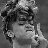

(1, 48, 48, 1)
(1, 48, 48, 1)
0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
[[0.10406367 0.00218619 0.01129904 0.34656185 0.37932992 0.00104361
  0.1555157 ]]


In [35]:
celeb = Image.open("celebfer2.jpg")
predict_emotion(model, celeb)